In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("./data/combined.csv")
df.head(5)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,timestamp,year,story_median,lease_remain_years
0,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,1,KALLANG/WHAMPOA,...,04 TO 06,74.0,Improved,1979,388000.0,63,2015-01-01,2015,5.0,55
1,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,3,KALLANG/WHAMPOA,...,07 TO 09,68.0,Improved,1979,350000.0,62,2016-03-01,2016,8.0,55
2,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,4,KALLANG/WHAMPOA,...,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,2017-04-01,2017,8.0,55
3,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,5,KALLANG/WHAMPOA,...,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,2017-05-01,2017,8.0,55
4,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,6,KALLANG/WHAMPOA,...,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,2017-06-01,2017,8.0,55


In [11]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
timestamp               object
year                     int64
story_median           float64
lease_remain_years       int64
dtype: object

In [12]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
timestamp              0
year                   0
story_median           0
lease_remain_years     0
dtype: int64

In [14]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df.head(2)

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,timestamp,year,story_median,lease_remain_years,storey_median
0,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,1,KALLANG/WHAMPOA,...,74.0,Improved,1979,388000.0,63,2015-01-01,2015,5.0,55,5.0
1,1.294801,103.854467,1,BEACH ROAD,189673,1 BEACH RD,1351.713661,143.728945,3,KALLANG/WHAMPOA,...,68.0,Improved,1979,350000.0,62,2016-03-01,2016,8.0,55,8.0


In [15]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df.head(2)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,1351.713661,143.728945,74.0,55,5.0,388000.0
1,1351.713661,143.728945,68.0,55,8.0,350000.0


In [16]:
scope_df = scope_df.drop_duplicates()
scope_df.head(2)

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,1351.713661,143.728945,74.0,55,5.0,388000.0
1,1351.713661,143.728945,68.0,55,8.0,350000.0


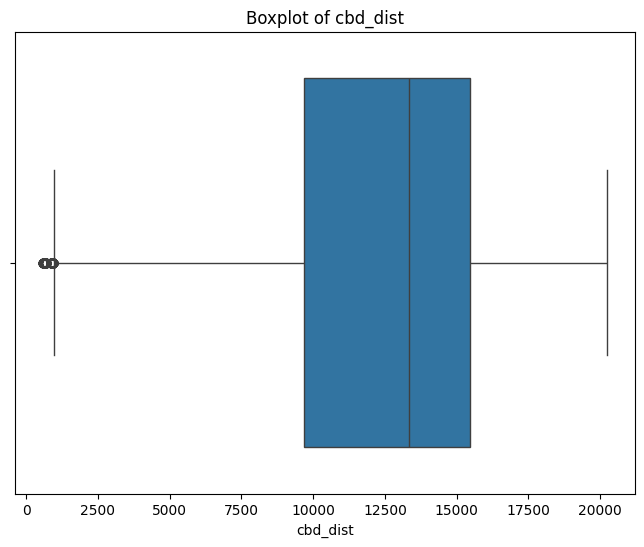

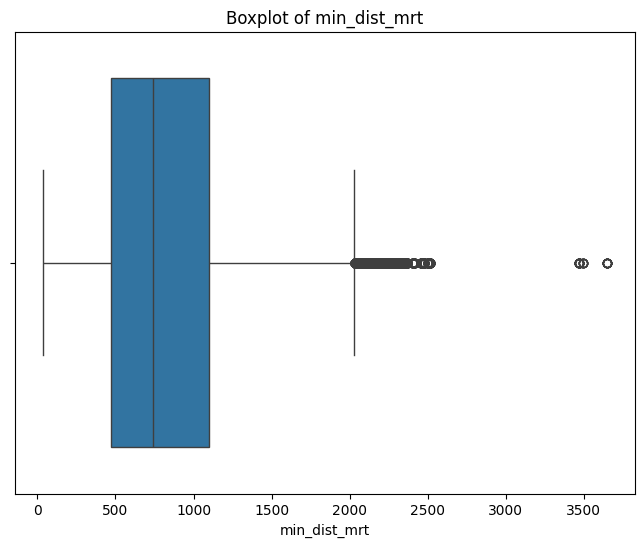

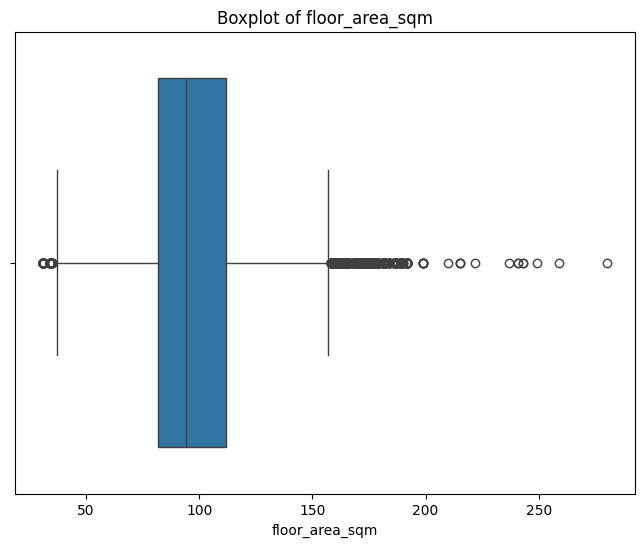

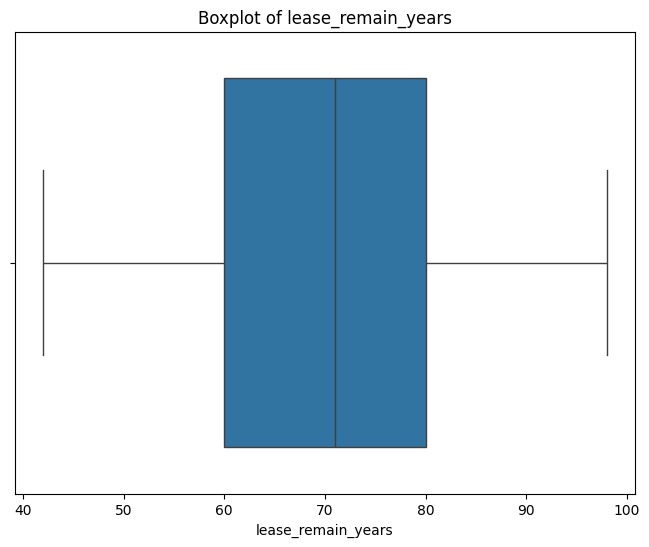

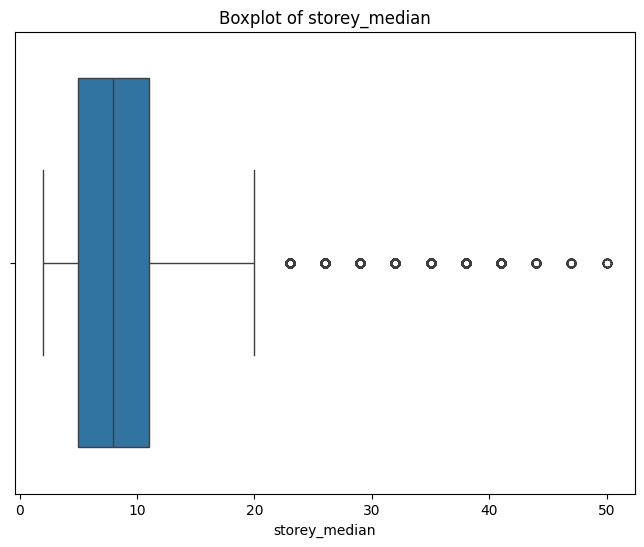

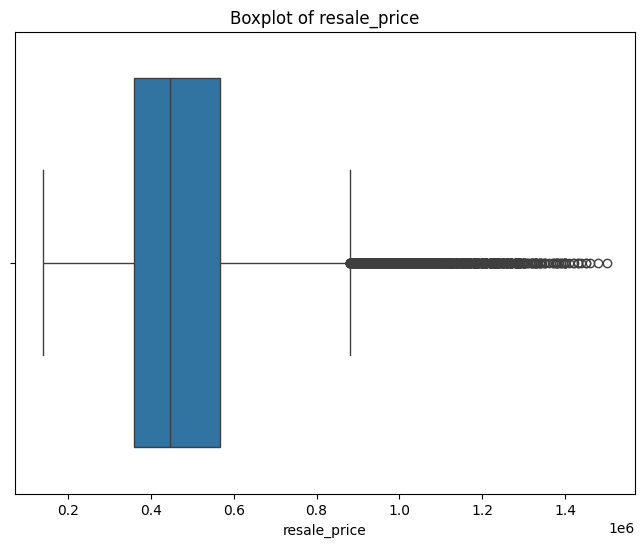

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [20]:
df1 = scope_df

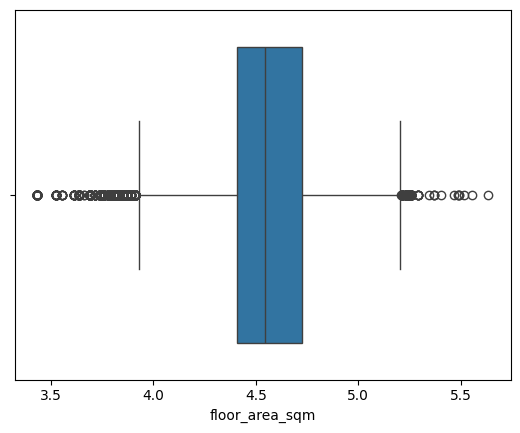

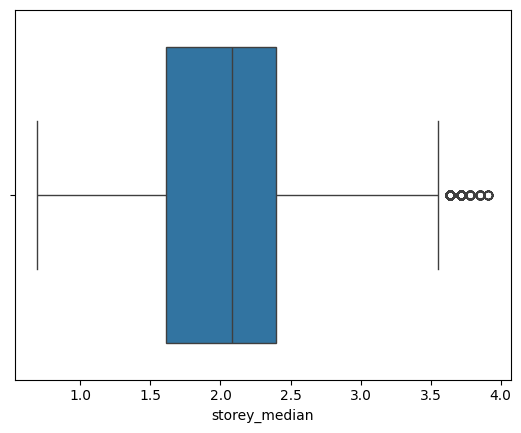

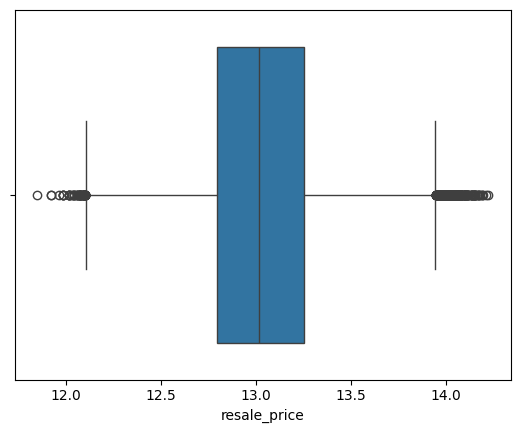

In [21]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()


In [22]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

<Axes: title={'center': 'Correlation Heatmap'}>

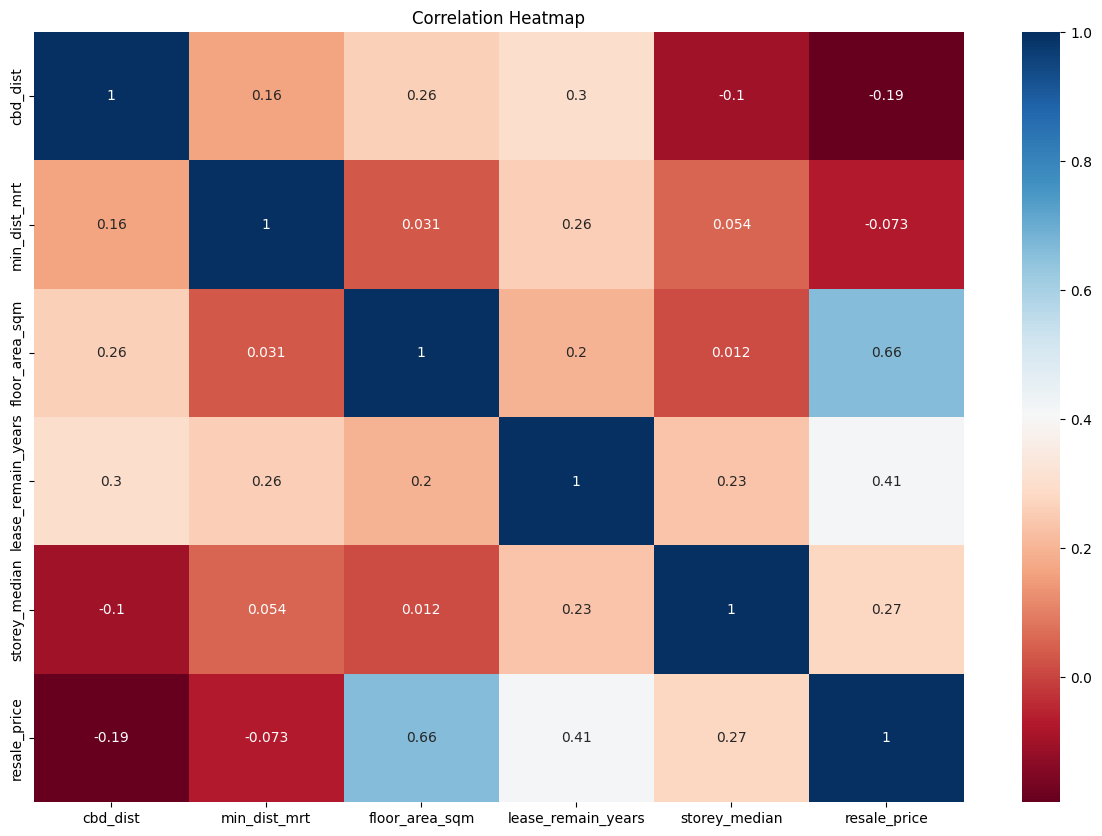

In [23]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [26]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-2.516313,-1.477669,-0.957335,-1.184227,-0.441646
1,-2.516313,-1.477669,-1.287662,-1.184227,0.212511
2,-2.516313,-1.477669,-1.287662,-1.184227,0.212511
3,-2.516313,-1.477669,-1.287662,-1.184227,0.212511
4,-2.516313,-1.477669,-1.287662,-1.184227,0.212511
...,...,...,...,...,...
195921,-2.249829,-1.392911,-0.106789,1.563372,0.655739
195922,-2.249829,-1.392911,0.661668,1.563372,1.261620
195923,-2.249829,-1.392911,0.661668,1.563372,1.852978
195924,-2.249829,-1.392911,0.661668,1.563372,0.212511


In [28]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 2}
 
Mean squared error: 0.015135436896650594
Mean Absolute Error 0.09662017795752507
Root Mean squared error: 0.12302616346391769
 
R-squared: 0.8603560490106739


In [30]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

227686.13775445067

In [31]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)